In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

In [2]:
df = pd.read_csv('nprs_final.csv')

In [3]:
df.head(3)

,Unnamed: 0,user_id,track_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,artist_id,tag,uid_code,tid_code,aid_code
0,0,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"['postpunk', 'nowplaying', 'deathrock', 'goth']",6457,65356,11306
1,1,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-02-19 11:21:51,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"['postpunk', 'nowplaying', 'deathrock', 'goth']",6457,65356,11306
2,2,81496937,cd52b3e5b51da29e5893dba82a418a4b,2014-03-02 15:28:20,0.00479,0.18,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,1.0,6.0,b2980c722a1ace7a30303718ce5491d8,"['postpunk', 'nowplaying', 'deathrock', 'goth']",6457,65356,11306


Being that the plan is to user matrix factorizition the only relevant information from the dataframe we need are the uid_code, tid_code, as the factorized components W and H which store the latent features are used to make recommendations.  These are the user id and track id codes from users and songs in the dataset.  We will plot distributions of user listen counts and track listen counts.

In [4]:
# Create a column of ones to sum over groupby operation
df['count'] = 1

### User/Listen Count Distributions

In [70]:
#Create user/listen count dataframe
users = df.groupby('uid_code')['count'].sum().to_frame()

In [71]:
users.head()

,count
uid_code,
0,53
1,24
2,16
3,17
4,17


Text(0, 0.5, 'Number of Users')

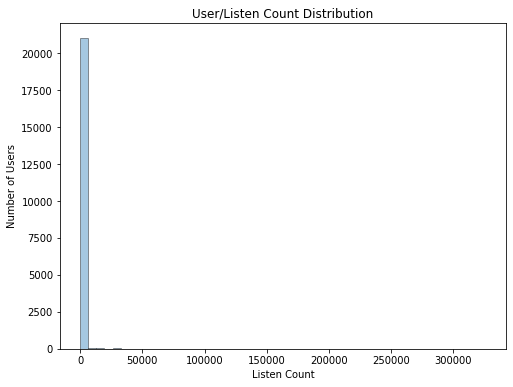

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(users,kde=False)
plt.title('User/Listen Count Distribution')
plt.xlabel('Listen Count')
plt.ylabel('Number of Users')

Text(0, 0.5, 'Number of Users')

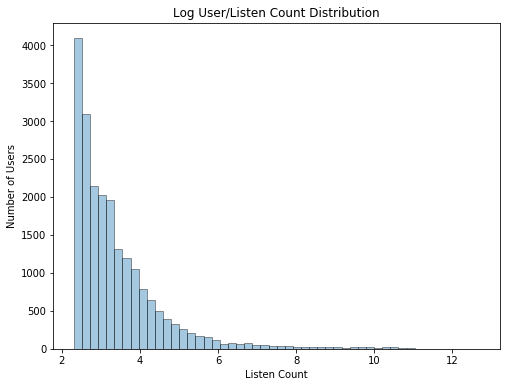

In [21]:
#apply log function to reduce skewness
plt.figure(figsize=(8,6))
sns.distplot(np.log(users),kde=False)
plt.title('Log User/Listen Count Distribution')
plt.xlabel('Listen Count')
plt.ylabel('Number of Users')

In addition to applying a log transform to the data to reduce skewness, we can filter the original of users that have less than 200 listens.  Lets filter users with less than 200 listens to get a better picture of the distribution

In [22]:
#Calculate mean and standard deviation of user/listen count
user_std = users['count'].std()
user_mean = users['count'].mean()

In [23]:
print(user_std,user_mean)

3291.2873179806825 298.60311027332705


We can see in the first plot a long tail from outliers, the few users that had really high listen counts pull the mean to 3291.  We know this not to be the case by examining the distribution with all of the data.  We can filter the users with listen counts less than 200 to get a better idea of the population activity.

In [24]:
#Filter users with less than 200 listening events
filt_user = users[users['count'] < 200]

In [25]:
#Calculate percentage of users with less than 200 listens
filt_percent = len(filt_user) / len(users)

In [26]:
print(f" The percentage of users with less than 200 listen events is {round(filt_percent,3)}")

 The percentage of users with less than 200 listen events is 0.936


By filtering the data to users with less than 200 listens, we can gain a clearer picture of the data while retaining 94% of the data

In [27]:
#Calculate filtered data mean and std
filt_user_std = filt_user['count'].std()
filt_user_mean = filt_user['count'].mean()
print(filt_user_std,filt_user_mean)

31.553831169879043 31.91396496173983


Text(0, 0.5, 'Number of Users')

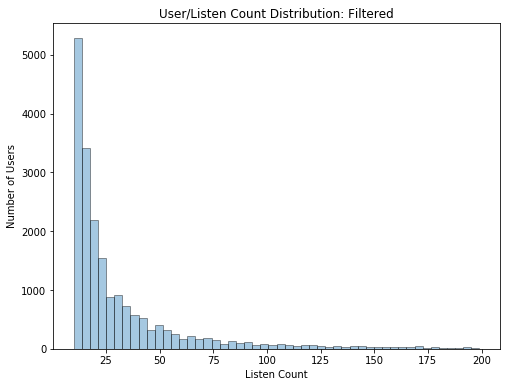

In [61]:
#Plot distribution of filtered data
plt.figure(figsize=(8,6))
sns.distplot(filt_user['count'],kde=False,bins=50)
plt.title('User/Listen Count Distribution: Filtered')
plt.xlabel('Listen Count')
plt.ylabel('Number of Users')

By filtering the user/listening event count to 200, we obtain a distribution that looks somewhat similar to the log distribution of the entire data.  Both give us a better idea of what the distribution looks like reducing while reducing outlier effects.  Here, the bin width represetns a range of listen counts.  For instance, the first bin represents over 5000 users with at least 10 listening events because we previously removed users with less than 10 listening events.

Text(0.5, 0, 'Number of Plays')

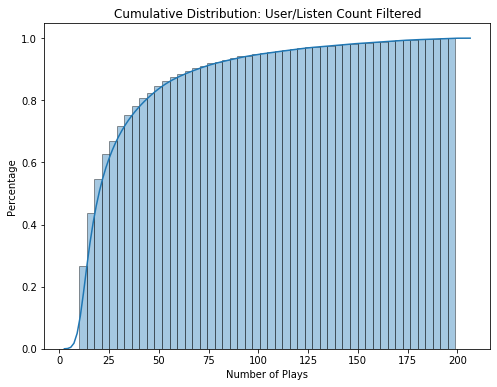

In [67]:
#plot cumulative distribution of filtered data
plt.figure(figsize=(8,6))
kwargs = {'cumulative': True}
sns.distplot(filt_user, hist_kws=kwargs, kde_kws=kwargs,bins=50)
plt.title('Cumulative Distribution: User/Listen Count Filtered')
plt.ylabel('Percentage')
plt.xlabel('Number of Plays')

The cumulative distribution shows that about 80% of users in the filtered data set have 50 or less plays attributed to them.

### Track/Listen Count Distributions

In [77]:
tracks = df.groupby('tid_code')['count'].sum().to_frame()

Text(0.5, 0, 'Listen Count')

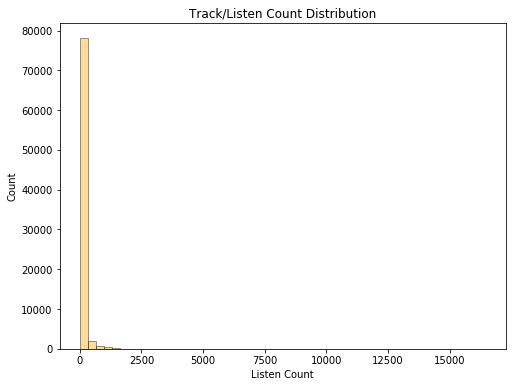

In [41]:
#plot track/listen count distribution
plt.figure(figsize=(8,6))
sns.distplot(tracks['count'],kde=False,bins=50,color='orange')
plt.title('Track/Listen Count Distribution')
plt.ylabel('Count')
plt.xlabel('Listen Count')

Text(0.5, 0, 'Listen Count')

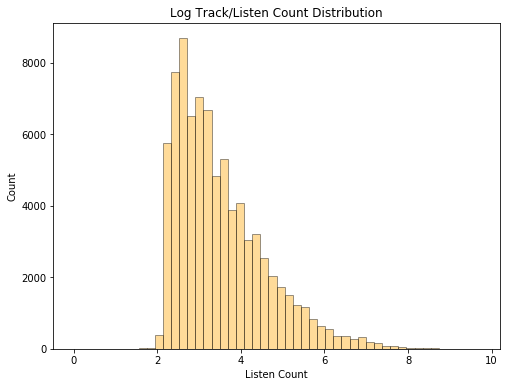

In [40]:
#plot log track/listen count distribution
plt.figure(figsize=(8,6))
sns.distplot(np.log(tracks['count']),kde=False,bins=50,color='orange')
plt.title('Log Track/Listen Count Distribution')
plt.ylabel('Count')
plt.xlabel('Listen Count')

In [33]:
#calculate mean and std of data
tracks_mean = tracks['count'].mean()
tracks_std = tracks['count'].std()
print(tracks_mean,tracks_std)

77.89678275942613 233.14421643472613


We know this to be highly skewed due to the tracks that have more than 275 plays.  The tracks with extremely high listen counts can be removed to get a better view of the distribution.

In [54]:
#Filter tracks with less than 275 plays
filt_tracks = tracks[tracks['count'] <= 250]

In [55]:
filt_percent_tracks = len(filt_tracks) / len(tracks)
print(f" The percentage of tracks with less than 275 listen events is {round(filt_percent_tracks,3)}")

 The percentage of tracks with less than 275 listen events is 0.943


In [56]:
#calculate mean and std of filtered data
filt_tracks_mean = filt_tracks['count'].mean()
filt_tracks_std = filt_tracks['count'].std()
print(filt_tracks_mean,filt_tracks_std)

42.06647116324536 44.61936245428972


Text(0.5, 0, 'Listen Count')

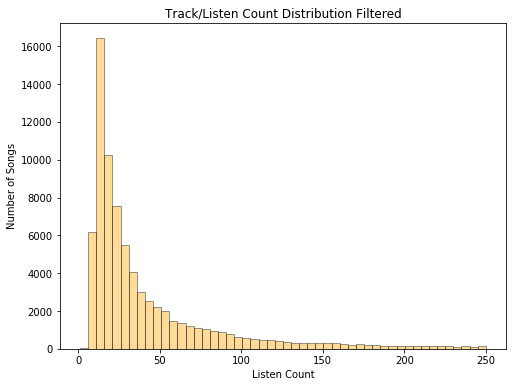

In [68]:
#Plot distribution of filtered track/listen data
plt.figure(figsize=(8,6))
sns.distplot(filt_tracks['count'],kde=False,bins=50,color='orange')
plt.title('Track/Listen Count Distribution Filtered')
plt.ylabel('Number of Songs')
plt.xlabel('Listen Count')

Text(0.5, 0, 'Number of Plays')

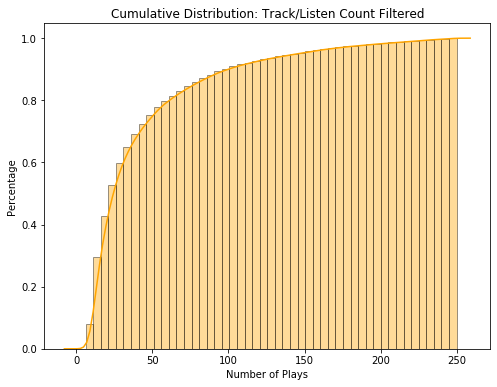

In [69]:
#plot cumulative distribution of track/listen data
plt.figure(figsize=(8,6))
kwargs = {'cumulative': True}
sns.distplot(filt_tracks, hist_kws=kwargs, kde_kws=kwargs,bins=50,color='orange')
plt.title('Cumulative Distribution: Track/Listen Count Filtered')
plt.ylabel('Percentage')
plt.xlabel('Number of Plays')

The above cumulative distribution of the filtered track count data shows that 80% of the songs had a listen count of 50 or less.